In [1]:
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from models.densenet import DenseNet3
import util.svhn_loader as svhn

In [2]:
transform_cifar = transforms.Compose([
  transforms.Resize(32),
  transforms.CenterCrop(32),
  transforms.ToTensor(),
  transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

datasets = {
  'CIFAR-10': torchvision.datasets.CIFAR10(root='./datasets/id_datasets/', train=False, download=True, transform=transform_cifar),
  'CIFAR-100': torchvision.datasets.CIFAR100(root='./datasets/id_datasets/', train=False, download=True, transform=transform_cifar), 
  'SVHN': svhn.SVHN('datasets/ood_datasets/svhn/', split='test', transform=transform_cifar, download=False),
  'dtd': torchvision.datasets.ImageFolder(root="datasets/ood_datasets/dtd/images", transform=transform_cifar),
  'places365': torchvision.datasets.ImageFolder(root="datasets/ood_datasets/places365/", transform=transform_cifar),
  'celebA': torchvision.datasets.CelebA(root='datasets/ood_datasets/', split='test', download=True, transform=transform_cifar),
  'iSUN': torchvision.datasets.ImageFolder("./datasets/ood_datasets/iSUN", transform=transform_cifar),
  'LSUN': torchvision.datasets.ImageFolder("./datasets/ood_datasets/LSUN", transform=transform_cifar),
  'LSUN_resize': torchvision.datasets.ImageFolder("./datasets/ood_datasets/LSUN_resize", transform=transform_cifar),
}

dataloaders = {
  k: torch.utils.data.DataLoader(v, batch_size=128, shuffle=False) for k,v in datasets.items()
}

ood_dls = ['SVHN', 'LSUN', 'LSUN_resize', 'iSUN', 'dtd', 'places365']

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [3]:
import sys
sys.path.append('./code/')

from stats import Stats

device = 'cuda:1'

In [4]:
model = DenseNet3(100, 10, 12, reduction=0.5, bottleneck=True, dropRate=0.0, normalizer=None, p=None, info=None)
checkpoint = torch.load("./checkpoints/CIFAR-10/densenet/checkpoint_100.pth.tar", map_location='cpu')
model.load_state_dict(checkpoint['state_dict'])
model.eval()
model.to(device);

In [5]:
return_nodes = {
  'x': 'input',
  'conv1': 'conv',
  'trans1.avg_pool2d': 'block1',
  'trans2.avg_pool2d': 'block2',
  'avg_pool2d': 'block3',
  'view': 'feature',
  'fc': 'logit',
}

s = Stats(model, return_nodes, device)
s.run(dataloaders['CIFAR-10'])
feats = s.compute()
feats

  0%|          | 0/79 [00:00<?, ?it/s]

{'input': array([0.01391145, 0.01470113, 0.01944824], dtype=float32),
 'conv': array([ 0.0300692 , -0.03171682,  0.0026812 , -0.01556184, -0.00105534,
        -0.01857447, -0.01210742,  0.01500094, -0.0126684 ,  0.00489096,
         0.0008766 , -0.02927496,  0.01265124, -0.03711249,  0.00023668,
         0.00416956, -0.03149645,  0.03399391, -0.004811  , -0.02217119,
         0.02629741,  0.02084318,  0.03033974,  0.01855685], dtype=float32),
 'block1': array([ 0.45268315,  0.14309022, -0.10524816,  0.25523746,  0.16223231,
        -0.21197447, -0.2690054 ,  0.13762346, -0.03541718, -0.3841478 ,
        -0.04963945, -0.17781597,  0.2588904 , -0.05749011, -0.17041752,
         0.25477755, -0.30189615, -0.62789047, -0.01865979, -0.07492347,
        -0.498544  , -0.24590227,  0.28332365, -0.29385358, -0.45628446,
         0.07699515, -0.05527983, -0.19238913,  0.17548575, -0.23065914,
        -0.12488803, -0.20898274,  0.15087132, -0.17017753, -0.0680646 ,
         0.11034206,  0.38224438

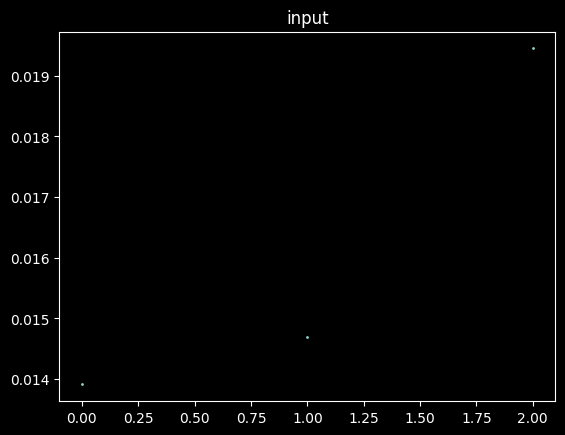

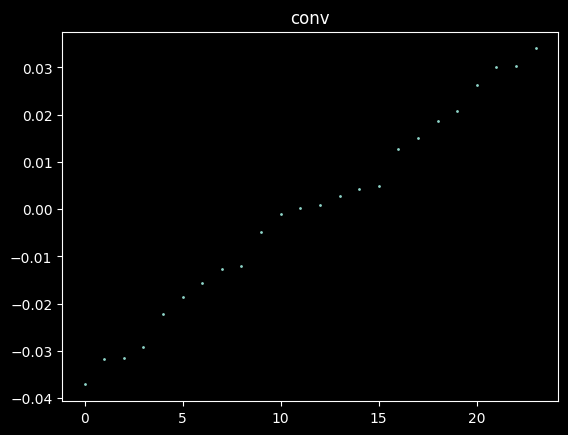

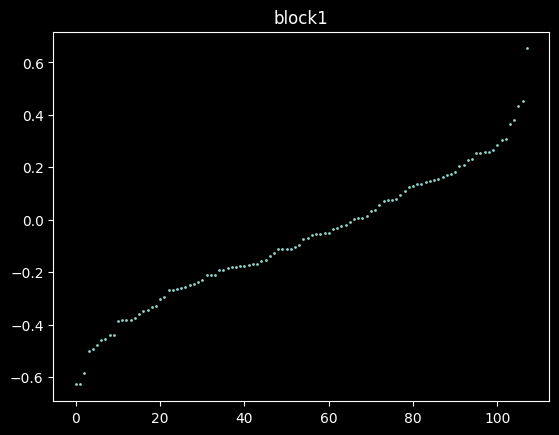

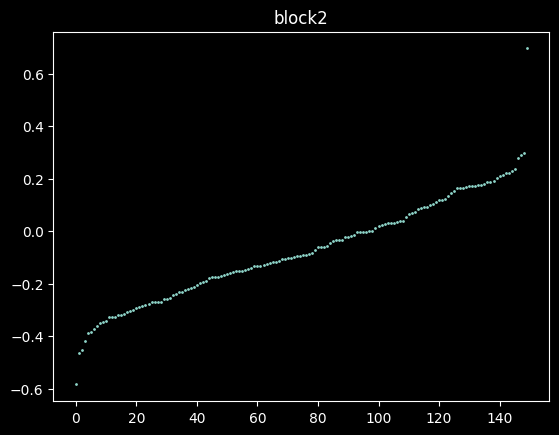

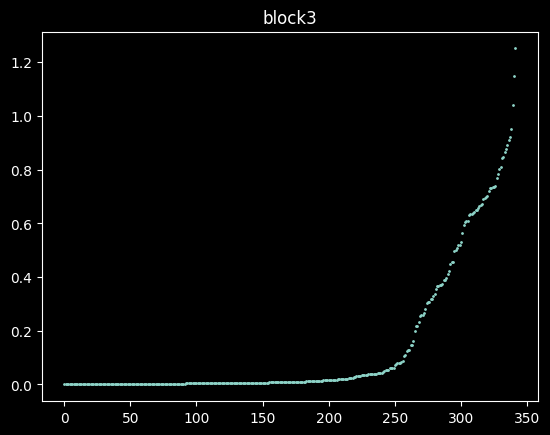

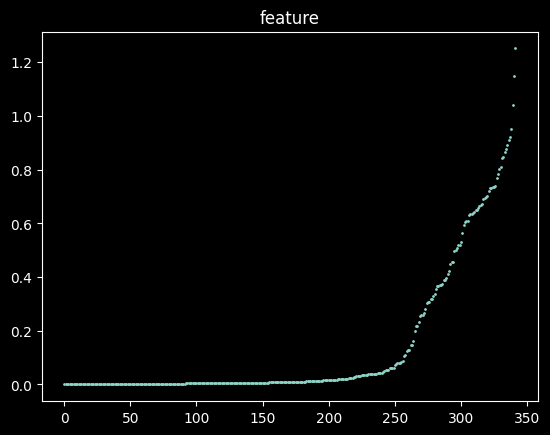

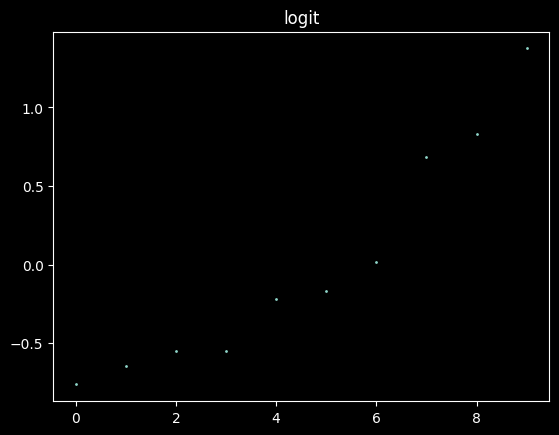

In [8]:
for k, v in feats.items():
  idx = v.argsort()
  plt.title(k)
  plt.scatter(range(len(v)), v[idx], s=1)
  plt.show()

In [9]:
_, eval_nodes = get_graph_node_names(model)
print(eval_nodes)

['x', 'conv1', 'block1.layer.0.bn1', 'block1.layer.0.relu', 'block1.layer.0.conv1', 'block1.layer.0.bn2', 'block1.layer.0.relu_1', 'block1.layer.0.conv2', 'block1.layer.0.cat', 'block1.layer.1.bn1', 'block1.layer.1.relu', 'block1.layer.1.conv1', 'block1.layer.1.bn2', 'block1.layer.1.relu_1', 'block1.layer.1.conv2', 'block1.layer.1.cat', 'block1.layer.2.bn1', 'block1.layer.2.relu', 'block1.layer.2.conv1', 'block1.layer.2.bn2', 'block1.layer.2.relu_1', 'block1.layer.2.conv2', 'block1.layer.2.cat', 'block1.layer.3.bn1', 'block1.layer.3.relu', 'block1.layer.3.conv1', 'block1.layer.3.bn2', 'block1.layer.3.relu_1', 'block1.layer.3.conv2', 'block1.layer.3.cat', 'block1.layer.4.bn1', 'block1.layer.4.relu', 'block1.layer.4.conv1', 'block1.layer.4.bn2', 'block1.layer.4.relu_1', 'block1.layer.4.conv2', 'block1.layer.4.cat', 'block1.layer.5.bn1', 'block1.layer.5.relu', 'block1.layer.5.conv1', 'block1.layer.5.bn2', 'block1.layer.5.relu_1', 'block1.layer.5.conv2', 'block1.layer.5.cat', 'block1.layer

In [10]:
return_nodes = {
  'x': 'input',
  'conv1': 'conv',
  'trans1.avg_pool2d': 'block1',
  'trans2.avg_pool2d': 'block2',
  'avg_pool2d': 'block3',
  'view': 'feature',
  'fc': 'logit',
}

model_feat = create_feature_extractor(model, return_nodes)
model_feat.graph.print_tabular()

opcode         name                    target                                                  args                                                                                                                                kwargs
-------------  ----------------------  ------------------------------------------------------  ----------------------------------------------------------------------------------------------------------------------------------  --------
placeholder    x                       x                                                       ()                                                                                                                                  {}
call_module    conv1                   conv1                                                   (x,)                                                                                                                                {}
call_module    block1_layer_0_bn1      block1.layer.0.bn1             

In [11]:
for x, y in dataloaders['CIFAR-100']:
  with torch.no_grad():
    features = model_feat(x.to(device))
  break

In [12]:
features['input'].shape

torch.Size([128, 3, 32, 32])

In [13]:
features['conv'].shape

torch.Size([128, 24, 32, 32])

In [14]:
features['block1'].shape

torch.Size([128, 108, 16, 16])

In [15]:
features['block2'].shape

torch.Size([128, 150, 8, 8])

In [16]:
features['block3'].shape

torch.Size([128, 342, 1, 1])

In [17]:
features['feature'].shape

torch.Size([128, 342])

In [18]:
features['logit'].shape

torch.Size([128, 10])

In [19]:
features['block1'].flatten(0).shape

torch.Size([3538944])